In [ ]:
# 🎮 Análise de Vendas da Franquia FIFA

# Introdução
# Este projeto utiliza dados históricos de vendas de jogos para explorar a performance
# da franquia FIFA ao longo dos anos. A análise foi feita com Python, SQL (via pandasql)
# e visualizações com Seaborn.

In [37]:
## Carregamento de dados do git para um datafram que chamei de dado
import numpy as np
import pandas as pd
path = 'https://raw.githubusercontent.com/xPedroNoronhax/analise_fifa_games/refs/heads/main/vgsales.csv'
dado = pd.read_csv(path)



In [2]:
!pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=14d944c821b8024a23ec3f0513167bebf97d60c079aedf5b77251150d92eba50
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [3]:
from pandasql import sqldf

In [38]:
## Realizando a query para achar no meu dataframe de games, apenas os jogos do Fifa.

In [4]:
query = "SELECT * FROM dado WHERE name LIKE 'FIFA%'"

In [5]:
all_fifa_games = sqldf(query, locals())
print(all_fifa_games)

      Rank                                Name Platform    Year   Genre  \
0       78                             FIFA 16      PS4  2015.0  Sports   
1       83                      FIFA Soccer 13      PS3  2012.0  Action   
2      113                             FIFA 14      PS3  2013.0  Sports   
3      122                             FIFA 12      PS3  2011.0  Sports   
4      125                             FIFA 15      PS4  2014.0  Sports   
..     ...                                 ...      ...     ...     ...   
127  13613  FIFA Soccer 2003 (weekly jp sales)      PS2  2002.0  Sports   
128  13853         FIFA World Cup Germany 2006       DS  2006.0  Sports   
129  14254        FIFA World Cup: Germany 2006      GBA  2006.0  Sports   
130  15208                      FIFA Soccer 09       PC  2008.0  Sports   
131  15840                      FIFA Soccer 08       PC  2007.0  Sports   

           Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0    Electronic Art

In [ ]:
## Aqui criei um novo arquivo csv apenas para armazenar os dados dos jogos Fifa que serão tratados em questão.

In [6]:
all_fifa_games.to_csv("fifa_games.csv", index=False)  # Salva sem o índice


In [7]:
path_fifa = 'https://raw.githubusercontent.com/xPedroNoronhax/analise_fifa_games/refs/heads/main/fifa_games.csv'

In [8]:
dados_all_fifagames = pd.read_csv(path_fifa)

In [9]:
dados_all_fifagames

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
1,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
2,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
3,122,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
4,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
...,...,...,...,...,...,...,...,...,...,...,...
127,13613,FIFA Soccer 2003 (weekly jp sales),PS2,2002.0,Sports,Electronic Arts,0.00,0.00,0.04,0.00,0.04
128,13853,FIFA World Cup Germany 2006,DS,2006.0,Sports,Electronic Arts,0.03,0.00,0.00,0.00,0.04
129,14254,FIFA World Cup: Germany 2006,GBA,2006.0,Sports,Electronic Arts,0.02,0.01,0.00,0.00,0.03
130,15208,FIFA Soccer 09,PC,2008.0,Sports,Electronic Arts,0.00,0.02,0.00,0.00,0.02


In [10]:
fifas_listados = 'SELECT DISTINCT name FROM dados_all_fifagames'

In [11]:
lista_fifas = sqldf(fifas_listados, locals())

In [12]:
## Qual o fifa mais vendido da historia?

In [13]:
query = '''SELECT DISTINCT name, sum(global_sales) AS total_vendas
from dados_all_fifagames
WHERE name LIKE 'FIFA%'
GROUP by name
ORDER BY total_vendas DESC'''

In [14]:
ranking_fifa_maisvendidos = sqldf(query,locals())

<ipython-input-16-5f216d9a226d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


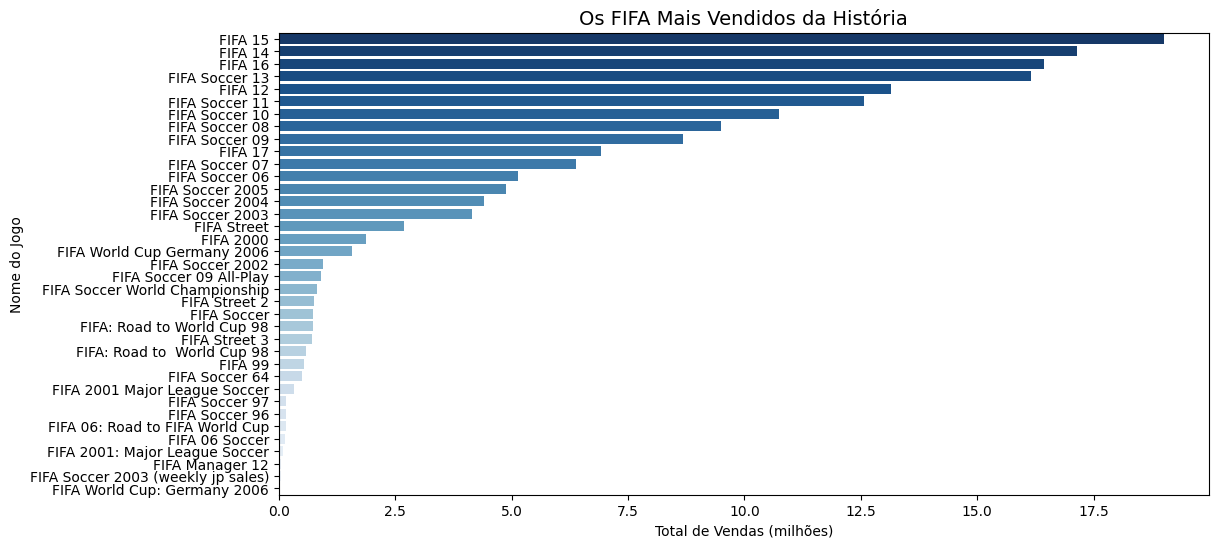

In [16]:
ranking_fifa_maisvendidos = ranking_fifa_maisvendidos.sort_values(by="total_vendas", ascending=False)

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ranking_fifa_maisvendidos,
    x="total_vendas",
    y="Name",
    palette="Blues_r"
)

# Adicionando título e rótulos
plt.title("Os FIFA Mais Vendidos da História", fontsize=14)
plt.xlabel("Total de Vendas (milhões)")
plt.ylabel("Nome do Jogo")

# Exibir o gráfico
plt.show()


In [17]:
##Qual plataforma vendeu mais fifas na historia
query = '''SELECT
    CASE
        WHEN platform LIKE 'PS%' THEN 'PlayStation'
        WHEN platform LIKE 'X%' THEN 'Xbox'
        WHEN platform IN ('N64', 'GBA', 'GC', 'DS', 'Wii', 'WiiU', '3DS') THEN 'Nintendo'
        WHEN platform = 'PC' THEN 'PC'
        ELSE platform = 'Outros'
    END AS Console,
    COUNT(*) AS Lançamentos
FROM dados_all_fifagames
GROUP BY Console
ORDER BY Lançamentos DESC;
'''

In [18]:
ranking_consoles = sqldf(query, locals())
ranking_consoles

,Console,Lançamentos
0,PlayStation,55
1,Nintendo,39
2,Xbox,27
3,PC,11


,Plataforma,Total de Vendas (milhões)
0,PlayStation,55
1,Nintendo,39
2,Xbox,27
3,PC,11


<ipython-input-19-a1331b7b79f0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Plataforma", y="Total de Vendas (milhões)", data=df_vendas, palette="viridis")


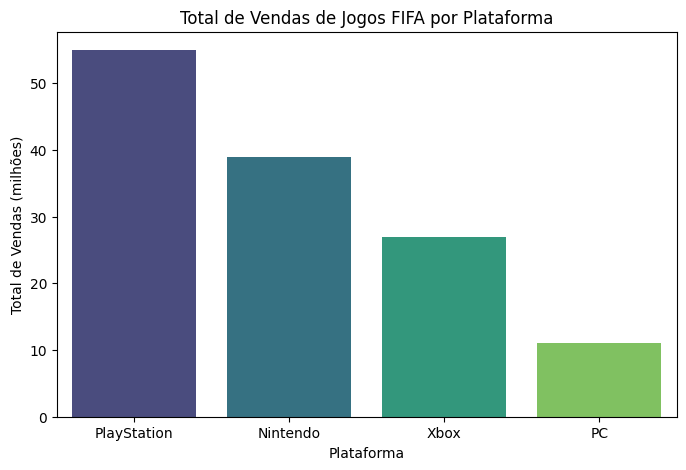

In [19]:


# Criando o DataFrame com os dados
data = {
    "Plataforma": ["PlayStation", "Nintendo", "Xbox", "PC"],
    "Total de Vendas (milhões)": [55, 39, 27, 11]
}

df_vendas = pd.DataFrame(data)

# Exibir a tabela no Notebook
display(df_vendas)

# Criar um gráfico de barras para melhor visualização
plt.figure(figsize=(8, 5))
sns.barplot(x="Plataforma", y="Total de Vendas (milhões)", data=df_vendas, palette="viridis")
plt.title("Total de Vendas de Jogos FIFA por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Total de Vendas (milhões)")
plt.show()


In [20]:
##Evolução das vendas ao longo dos anos

In [21]:
query = '''
SELECT
    CAST(year AS INTEGER) AS year,
    SUM(global_sales) AS total_vendas
FROM dados_all_fifagames
GROUP BY year
ORDER BY total_vendas DESC;
 '''

In [22]:
venda_anos = sqldf(query,locals())

In [23]:
venda_anos

,year,total_vendas
0,2014.0,19.02
1,2012.0,18.99
2,2013.0,17.14
3,2015.0,16.44
4,2011.0,13.20
5,2010.0,12.56
6,2009.0,10.74
7,2008.0,10.29
8,2007.0,9.49
9,2006.0,8.73


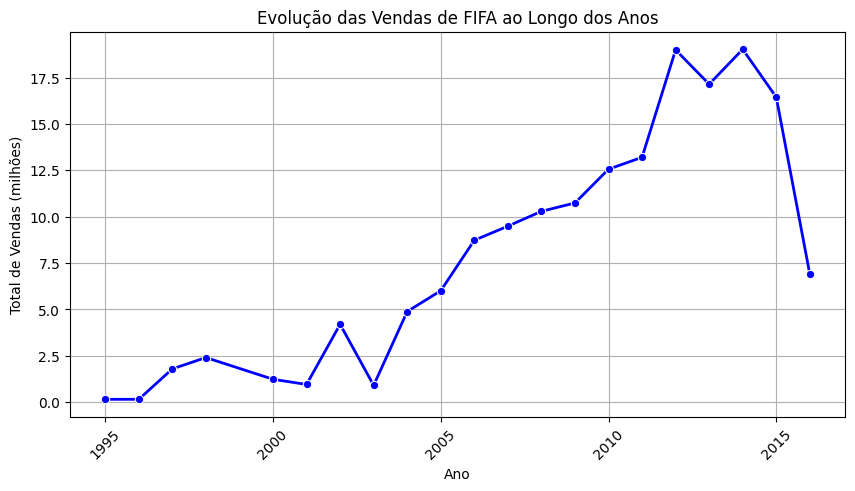

In [24]:

# Executa a query no Pandas
df_vendas = sqldf(query, locals())

# Remover valores NaN
df_vendas.dropna(inplace=True)

# Criar o gráfico de linha
plt.figure(figsize=(10, 5))
sns.lineplot(x="year", y="total_vendas", data=df_vendas, marker="o", linewidth=2, color="b")

# Configuração do gráfico
plt.title("Evolução das Vendas de FIFA ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Total de Vendas (milhões)")
plt.xticks(rotation=45)  # Rotaciona os anos para melhor leitura
plt.grid(True)

# Exibir o gráfico
plt.show()

In [25]:
##Comparação de vendas regionais

In [26]:
query = '''SELECT sum(na_sales) as america_norte,sum(eu_sales) as europa, sum(jp_sales) as japao, sum(other_sales) as outros
FROM dados_all_fifagames
'''

In [27]:
vendas_regionais_ = sqldf(query,locals())

In [28]:
vendas_regionais_

,america_norte,europa,japao,outros
0,32.42,103.54,2.34,31.32


In [29]:
vendas_regionais = np.transpose(vendas_regionais_)

In [30]:
vendas_regionais

,0
america_norte,32.42
europa,103.54
japao,2.34
outros,31.32


<ipython-input-31-e7fa49ddce34>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Região", y="Vendas", data=df_vendas, palette="viridis")


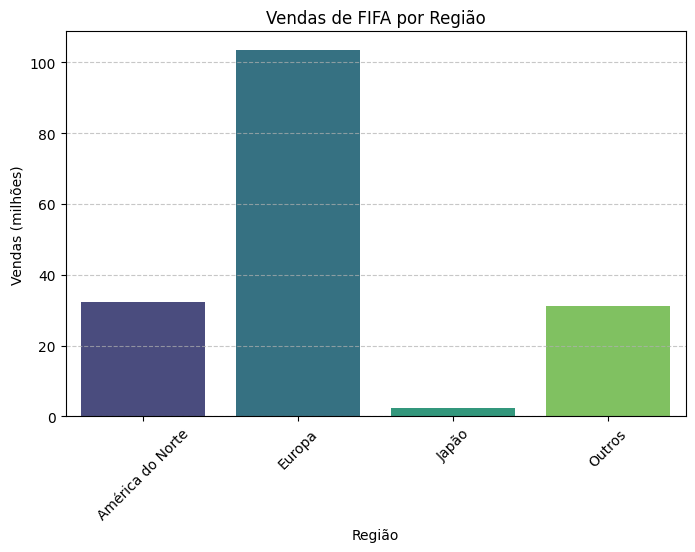

In [31]:
dados = {
    "Região": ["América do Norte", "Europa", "Japão", "Outros"],
    "Vendas": [32.42, 103.54, 2.34, 31.32]
}

df_vendas = pd.DataFrame(dados)

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x="Região", y="Vendas", data=df_vendas, palette="viridis")

# Adicionando títulos e rótulos
plt.title("Vendas de FIFA por Região")
plt.xlabel("Região")
plt.ylabel("Vendas (milhões)")
plt.xticks(rotation=45)  # Rotaciona os nomes das regiões para melhor leitura
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Adiciona linhas no fundo para melhor visualização

# Exibir o gráfico
plt.show()

In [32]:
###Média de vendas por plataforma

In [33]:
query = '''SELECT
    CASE
        WHEN platform LIKE 'PS%' THEN 'PlayStation'
        WHEN platform LIKE 'X%' THEN 'Xbox'
        WHEN platform IN ('N64', 'GBA', 'GC', 'DS', 'Wii', 'WiiU', '3DS') THEN 'Nintendo'
        WHEN platform = 'PC' THEN 'PC'
        ELSE 'Outros'
    END AS Console,
    SUM(global_sales) / COUNT(*) AS media_vendas
FROM dados_all_fifagames
GROUP BY Console
ORDER BY media_vendas DESC;
'''

In [34]:
medias_venda_plataforma = sqldf(query,locals())


In [35]:
medias_venda_plataforma

,Console,media_vendas
0,PlayStation,2.013636
1,Xbox,1.568889
2,Nintendo,0.371026
3,PC,0.196364


<ipython-input-36-0fad8c250460>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Console", y="media_vendas", data=medias_venda_plataforma, palette="plasma")


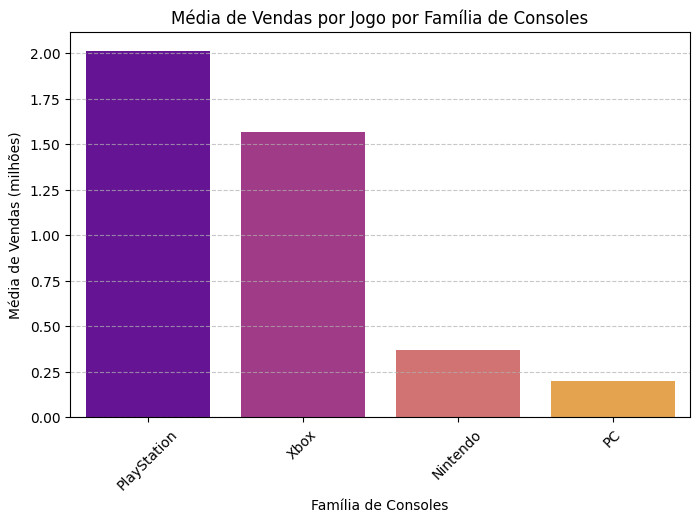

In [36]:
# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x="Console", y="media_vendas", data=medias_venda_plataforma, palette="plasma")

# Configurações do gráfico
plt.title("Média de Vendas por Jogo por Família de Consoles")
plt.xlabel("Família de Consoles")
plt.ylabel("Média de Vendas (milhões)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()